#### https://en.wikipedia.org/wiki/Kernel_density_estimation

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
dataset = randn(25)

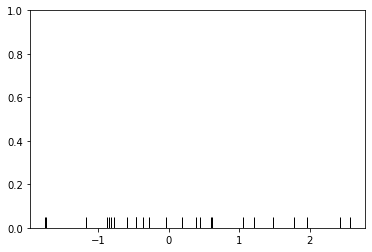

In [7]:
sns.rugplot(dataset, color = None)
# see the density of plot

(0, 1)

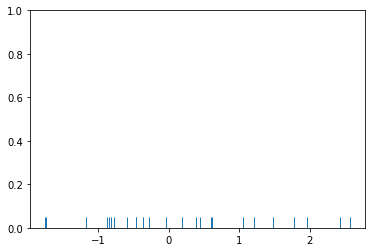

In [8]:
sns.rugplot(dataset)
plt.ylim(0,1)

#plt.ylim(downward limit, upper limit)

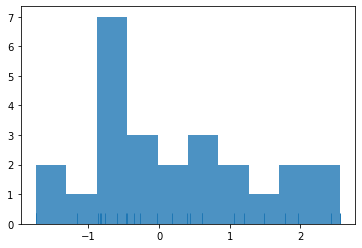

In [9]:
plt.hist(dataset, alpha = 0.8)
sns.rugplot(dataset)

# control transparent by passing alpha

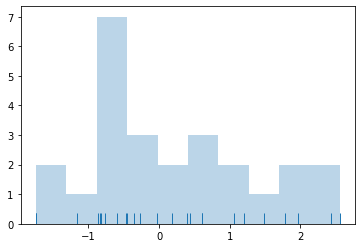

In [11]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

# show the density of each section with height.

(0, 1)

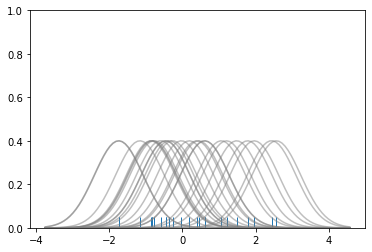

In [17]:
sns.rugplot(dataset)

x_min = dataset.min() - 2 
# -2 is for some space of graph

x_max = dataset.max() + 2
# +2 is for some space of graph

x_axis = np.linspace(x_min, x_max, 100)
# linear space
# 100 is space point

# Partical estimation of the bandwith (wiki)
bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) **0.2

kernel_list = []

for data_point in dataset:
    
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color = 'gray', alpha = 0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

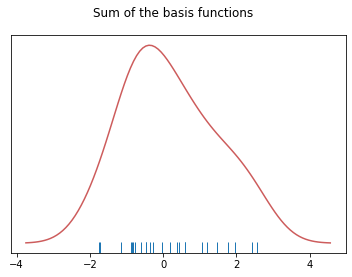

In [18]:
sum_of_kde = np.sum(kernel_list, axis = 0)
# sum of kernel

fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')

sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

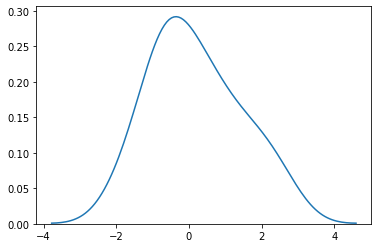

In [19]:
# same function with the upper code (easy way, seaborn)

sns.kdeplot(dataset)


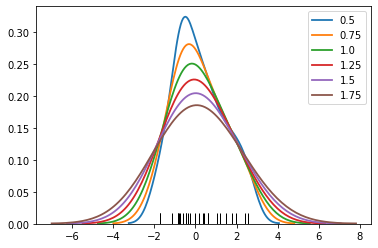

In [27]:
sns.rugplot(dataset, color = 'black')

# bw = bandwidth
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw = bw, lw = 1.8, label = bw)
    
# sns.kdeplot(): https://seaborn.pydata.org/generated/seaborn.kdeplot.html
# bw = band width

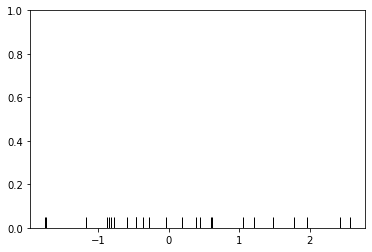

In [26]:
sns.rugplot(dataset, color = 'black')

In [29]:
url = 'https://en.wikipedia.org/wiki/Kernel_(statistics)'

# see the different type of graph's options

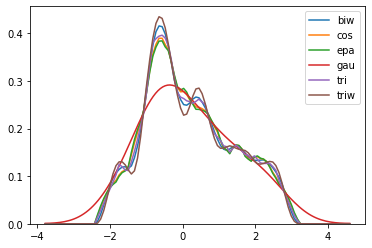

In [32]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern, label = kern)

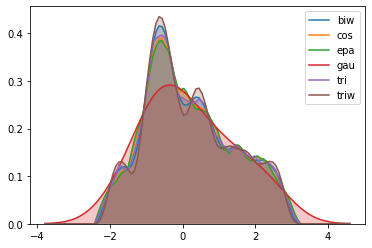

In [33]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern, label = kern, shade = True)

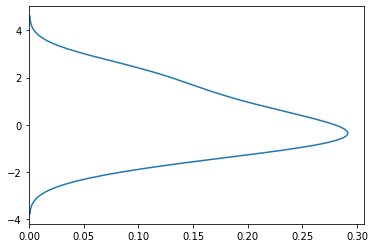

In [35]:
sns.kdeplot(dataset, vertical = True)


# rotate

#### Cumulative_distribution_function

In [36]:
url = 'https://en.wikipedia.org/wiki/Cumulative_distribution_function'

# graph has a limit value
# shape seems like population  growth graph
# 

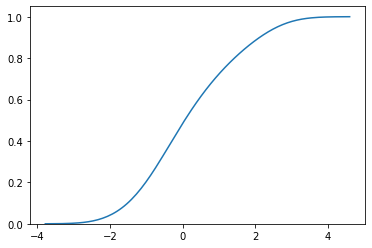

In [37]:
sns.kdeplot(dataset, cumulative = True)

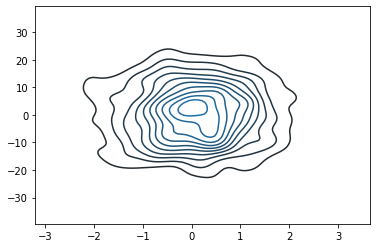

In [44]:
mean = [0,0]
cov = [[1,0],[0,100]]
# cov = covariance: https://en.wikipedia.org/wiki/Covariance

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns = ['X', 'Y'])

sns.kdeplot(dframe)

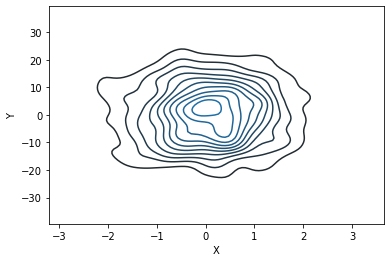

In [45]:
# or (pass two vectors)

sns.kdeplot(dframe.X, dframe.Y)

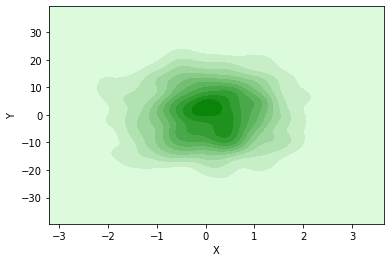

In [47]:
sns.kdeplot(dframe.X, dframe.Y, shade = True, color = 'g')

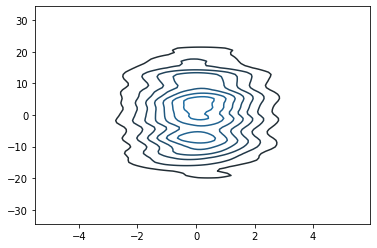

In [48]:
sns.kdeplot(dframe, bw = 1)

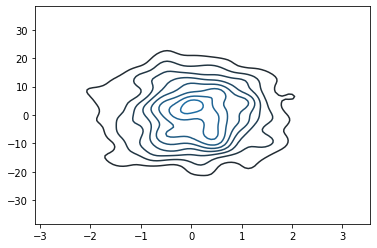

In [49]:
sns.kdeplot(dframe, bw = 'silverman')

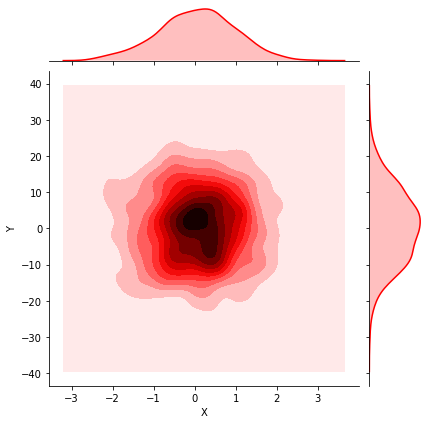

In [51]:
# using joiuntpolot

sns.jointplot('X', 'Y', dframe, kind = 'kde', color = 'r')